https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html

## Keypoints
Keypoint extraction give position (x,y) of keypoints in the image. Depending on the algorithm, it is defined as a possible. Keypoints are significant point in the image. In alg like SIFT, keypoints are scale and rotation invariant
## Descriptors
Descriptors describe the region of a keypoint like the scale and orientation/rotation of the keypoint through local image gradients. 


Corner detection like Harris is not scale invariant - if images are scaled, corners may not be detected as a corner.

Gaussian Filter - To mute noise in an imagel such as reducing noise from image taken in low light; eliminate bright pixels, smooth edges.
Standard Deviation (STD) - In this context, acts as a scaling parameter.
(x, y, std) - point (x,y) with std scale.
Scale-Space Filtering - To detect larger corners with larger window of scale.
Laplacian of Gaussian - (costly) Scale space filter. Acts as a blob detector that can detect blobs in various sizes due to change in STD. Low STD -> fits better for small corners; High STD -> fits better for larger corners.
Difference of Gaussians - approximation of LoG. The difference between the blurred image and less blurred image of the original.

# SIFT (Scale-Invariant Feature Transform)
Keypoints are identified based on their local extrema and described by the area surrounding the keypoints. 
- Scale and rotational invariant

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
# Read the images
object_img = cv.imread("clock.png")
scene_img = cv.imread("desk.jpg")

In [3]:
object_grey = cv.cvtColor(src=object_img, code=cv.COLOR_BGR2GRAY)
scene_grey = cv.cvtColor(src=scene_img, code=cv.COLOR_BGR2GRAY)

### SIFT: Get KeyPoint and Descriptors

In [4]:
sift = cv.SIFT_create()

In [5]:
object_kp, object_des = sift.detectAndCompute(object_grey, None)
scene_kp, scene_des = sift.detectAndCompute(scene_grey, None)

In [6]:
object_draw = cv.drawKeypoints(object_grey, object_kp, object_img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
scene_draw = cv.drawKeypoints(scene_grey, scene_kp, scene_img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [ ]:
plt.figure(figsize=(20, 10))
plt.suptitle("Scale Invariant Feature Transform - SIFT")
plt.subplot(1, 2, 1)
plt.title('Object SIFT Image')
plt.imshow(object_img)
plt.subplot(1, 2, 2)
plt.title('Scene SIFT Image')
plt.imshow(scene_img)

In [ ]:
cv.imwrite('sift_object_kp.jpg', object_img)
cv.imwrite('sift_scene_kp.jpg', scene_img)

In [ ]:
print(len(object_kp), len(object_des))
print(len(scene_kp), len(scene_des))

# Feature Matching

# Brute Force Knn Match
Brute Force Matching takes the descriptor of one feature in the first set and matched with all other features in the second set. It calculates the distance between each descriptor, matching the closest pair for each point.

In [10]:
# Create a BFmatcher object
# SIFT/SURF return detectorType() of CV32F float, Hamming-distance cannot be used - only for binary feature types like ORB.


In [11]:
# Match descriptors
bf = cv.BFMatcher()
sift_matches = bf.knnMatch(object_des, scene_des, k=2)

In [22]:
print(len(sift_matches))
sift_matches

865


((< cv2.DMatch 0x7f8cd2d370f0>, < cv2.DMatch 0x7f8cbbf86910>),
 (< cv2.DMatch 0x7f8cbbf868f0>, < cv2.DMatch 0x7f8cbbf868b0>),
 (< cv2.DMatch 0x7f8cbbf85490>, < cv2.DMatch 0x7f8cbbf86890>),
 (< cv2.DMatch 0x7f8cbbf86970>, < cv2.DMatch 0x7f8cbbf86810>),
 (< cv2.DMatch 0x7f8cbbf84730>, < cv2.DMatch 0x7f8cbbf869b0>),
 (< cv2.DMatch 0x7f8cbbf868d0>, < cv2.DMatch 0x7f8cbbf86930>),
 (< cv2.DMatch 0x7f8cbbf869f0>, < cv2.DMatch 0x7f8cbbf86990>),
 (< cv2.DMatch 0x7f8cbbf86a30>, < cv2.DMatch 0x7f8cbbf86a50>),
 (< cv2.DMatch 0x7f8cbbf86a70>, < cv2.DMatch 0x7f8cbbf86a90>),
 (< cv2.DMatch 0x7f8cbbf86ab0>, < cv2.DMatch 0x7f8cbbf86ad0>),
 (< cv2.DMatch 0x7f8cbbf86af0>, < cv2.DMatch 0x7f8cbbf86b10>),
 (< cv2.DMatch 0x7f8cbbf86b30>, < cv2.DMatch 0x7f8cbbf86b50>),
 (< cv2.DMatch 0x7f8cbbf86b70>, < cv2.DMatch 0x7f8cbbf86b90>),
 (< cv2.DMatch 0x7f8cbbf86bb0>, < cv2.DMatch 0x7f8cbbf86bd0>),
 (< cv2.DMatch 0x7f8cbbf86bf0>, < cv2.DMatch 0x7f8cbbf86c10>),
 (< cv2.DMatch 0x7f8cbbf86c30>, < cv2.DMatch 0x7f8cbbf8

In [34]:
# Ratio Test
good = []
for m, n in sift_matches:
    print(m.distance, n.distance)
    if m.distance < 0.65* n.distance:
        good.append([m])    # append to list as a list
print("Good matches found: ", len(good))      

361.5411376953125 395.9002380371094
399.5660095214844 400.7293395996094
186.812744140625 198.40110778808594
167.16758728027344 172.03778076171875
285.6676330566406 292.760986328125
178.51890563964844 186.26861572265625
204.8828887939453 218.4239044189453
283.9207763671875 317.4176940917969
242.6149139404297 248.0100860595703
318.10845947265625 368.9512023925781
344.4720458984375 348.73773193359375
127.57743072509766 324.2159729003906
116.79469299316406 280.7169494628906
277.1876525878906 293.6017761230469
349.7456359863281 351.1523742675781
199.81491088867188 254.22824096679688
292.57989501953125 295.5334167480469
292.4414367675781 303.7861022949219
239.62261962890625 249.04818725585938
266.3944396972656 318.053466796875
226.79286193847656 236.96624755859375
167.95237731933594 205.88589477539062
145.6399688720703 269.4717102050781
327.4278564453125 332.0361328125
316.2167053222656 350.18280029296875
363.9285583496094 368.7478942871094
330.78997802734375 334.8298034667969
357.9343566894

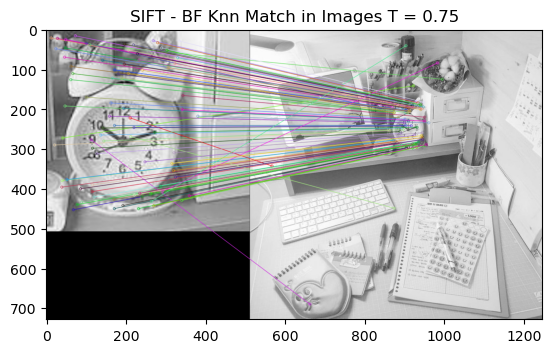

In [33]:
bf_match_img = cv.drawMatchesKnn(object_grey, object_kp,
                                  scene_grey, scene_kp, good, None,
                                  flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(bf_match_img)
plt.title("SIFT - BF Knn Match in Images T = 0.75")
cv.imwrite('sift_bf_match_75.jpg', bf_match_img)
plt.show()

# Fast Library for Approximate Nearest Neighbours (FLANN) Matcher
FLANN works faster than BFmatcher for larger datasets.
FLANN has two parameters of dictionaries, IndexParams and SearchParams which specifies number of times the trees in the IndexParams should be recursively traversed. Higher check value gives better precision but takes longer time.

Binary Masks - defines region of interest (ROI) of an image. Mask pixel values 1 are ROI while 0 are not and part of a background.

In [16]:
# Setting FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)

In [17]:
# Find matches
flann_matches = flann.knnMatch(object_des, scene_des, k=2)

In [18]:
# Create mask
flann_matchesMask = [[0,0] for i in range(len(flann_matches))]

In [19]:
count_good = 0
for i, (m,n) in enumerate(flann_matches):
    if m.distance < 0.7*n.distance:
        flann_matchesMask[i] = [1,0]
        count_good += 1
print("Good matches found: ", count_good)

Good matches found:  81


In [20]:
draw_params = dict(#matchColor = (0, 255, 0),
singlePointColor = (255, 0, 0),
matchesMask = flann_matchesMask,
flags = cv.DrawMatchesFlags_DEFAULT)

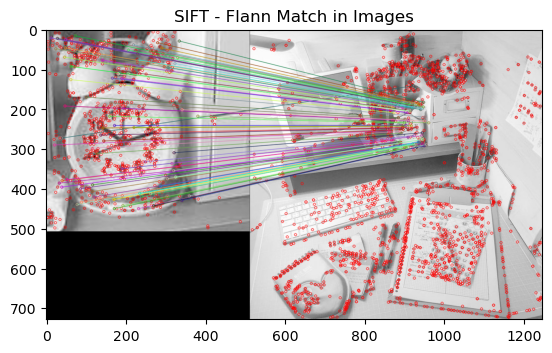

In [21]:
flann_match_img = cv.drawMatchesKnn(object_grey, object_kp, scene_grey, scene_kp, flann_matches, None, **draw_params)
plt.imshow(flann_match_img, )
plt.title("SIFT - Flann Match in Images")
cv.imwrite('sift_flann_match.jpg', flann_match_img)
plt.show()